<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/ABC_Cycle_Rent_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yulu Case Study :**

Yulu was established in 2017 with a vision to establish eco friendly mobility solution and also to cover last mile connectivity.

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!.


In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import math as mt
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.duplicated(subset='datetime').sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
987,2011-03-05 14:00:00,1,0,0,2,19.68,23.485,59,19.0012,80,118,198
1978,2011-05-09 08:00:00,2,0,1,1,21.32,25.000,55,15.0013,23,351,374
5738,2012-01-14 06:00:00,1,0,0,1,5.74,7.575,50,0.0000,0,5,5
6747,2012-03-18 10:00:00,1,0,0,2,17.22,21.210,88,7.0015,139,212,351
5875,2012-02-01 00:00:00,1,0,1,1,18.04,21.970,38,19.0012,0,31,31
10110,2012-11-06 15:00:00,4,0,1,1,13.94,15.910,46,16.9979,45,227,272
10489,2012-12-03 11:00:00,4,0,1,1,19.68,23.485,77,8.9981,51,182,233
5796,2012-01-16 16:00:00,1,1,0,1,10.66,11.365,44,23.9994,22,158,180
2645,2011-06-18 03:00:00,2,0,0,1,24.60,27.275,88,6.0032,4,16,20
5042,2011-12-04 04:00:00,4,0,0,1,10.66,15.150,87,0.0000,2,9,11


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Data Insight:**

1. No of rows = 10886
2. No Null
3. No Duplicates
4. More no of working days and less no of holidays
5. Average Bike rented on a day is around 190.
6. Average temperature is 20 degree celsius.
7. Mostly the weather is 1 or 2.
8. Four types of weather
9. Four types of seasons
10. Datetime colums is primary key

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['season'].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [ ]:
df['weather'].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

In [ ]:
df['holiday'].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [ ]:
df['workingday'].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

<Axes: xlabel='workingday', ylabel='count'>

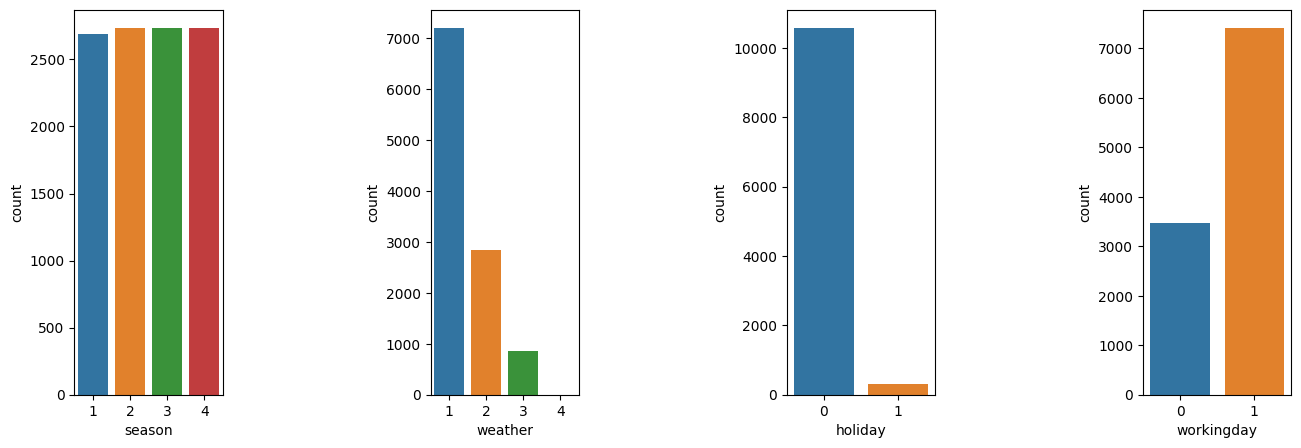

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,8,1)
sns.countplot(data=df,x='season')
plt.subplot(1,8,3)
sns.countplot(data=df,x='weather')
plt.subplot(1,8,5)
sns.countplot(data=df,x='holiday')
plt.subplot(1,8,7)
sns.countplot(data=df,x='workingday')

**Business Analysis 1:**

1. All seasons are equally present.
2. Weather 1(clear) & 2 (cloudy) are more prevailant than other weathers.
3. Weather 4(thunderstorm and heavy rain) is very rare
4. Holidays are very less though weekends are 30% there.

<Axes: xlabel='season', ylabel='count'>

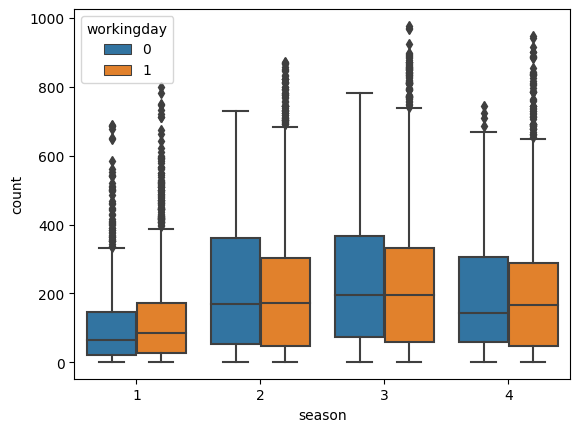

In [ ]:
sns.boxplot(data=df,x='season',y='count',hue='workingday')

<Axes: xlabel='season', ylabel='count'>

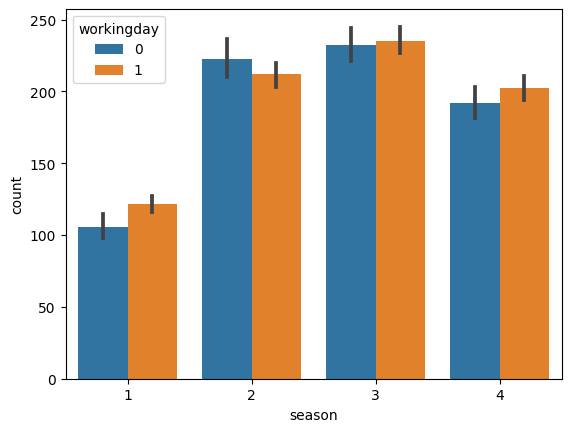

In [ ]:
sns.barplot(data=df,x='season',y='count',hue='workingday')

<Axes: xlabel='weather', ylabel='count'>

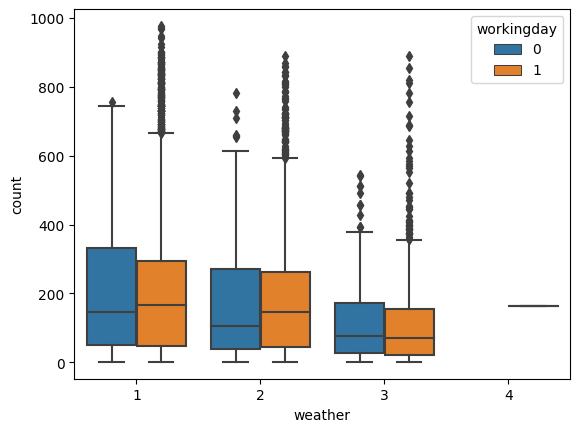

In [ ]:
sns.boxplot(data=df,x='weather',y='count',hue='workingday')

<Axes: xlabel='weather', ylabel='count'>

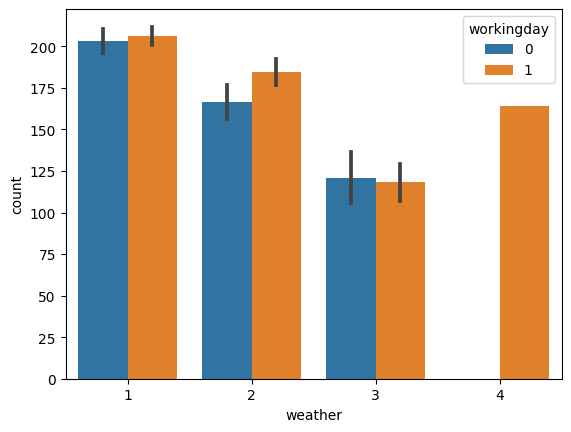

In [ ]:
sns.barplot(data=df,x='weather',y='count',hue='workingday')

**Business Analysis 2:**

1. Working Day which is either weekday(1) or weekend(0) has no effect on number of bicycles rented.

2. Majorly season 2(summer),3(fall),4(winter) have most count of bicycles as compared to season 1(spring)

3. Majorly weather 1(clear), 2(cloudy) have majority of bicycles rented whereas almost no bicycles are rented in weather 4(heavy rain & thunderstorm).



**Q1.Check Whether Working Day has effect on number of electric cycles rented or not.**

In [ ]:
#Getting count of cycles rented on working day and non working day for each row
work_day_rents = df[df['workingday']==1]['count'].reset_index(drop=True)
non_work_day_rents = df[df['workingday']==0]['count'].reset_index(drop=True)

#Ho: Workingday has NO effect on number of cycles rented
#Ha: Workingday has AN effect on number of cycles rented
alpha=0.05

#performing 2 sample t-test independent on workingday
t_stat,p_value = st.ttest_ind(work_day_rents, non_work_day_rents, alternative='two-sided')

print('P-Value: ',p_value)
if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis, Workingday has AN effect on number of bicycles rented')
else:
  print('Interpretation: Failed to Reject Null Hypothesis, Workingday has NO effect on number of bicycles rented')

P-Value:  0.22644804226361348
Interpretation: Failed to Reject Null Hypothesis, Workingday has NO effect on number of bicycles rented


**Q2. Check whether number of cycles rented similar or different in different seasons.**

In [ ]:
#Getting count of cycles rented for each season and each row
s1=df[df['season']==1]['count']
s2=df[df['season']==2]['count']
s3=df[df['season']==3]['count']
s4=df[df['season']==4]['count']
l=[s1,s2,s3,s4]

In [ ]:
#Checking for Gaussian using shapiro test
def shapirotest(data):
  alpha=0.1
  shapiro_stat,p_value=st.shapiro(data)
  if p_value<alpha:
    result='Not Gaussian'
  else:
    result='Gaussian Distribution'
  return result
for i in l:
  res=shapirotest(i)
  print(res)


Not Gaussian
Not Gaussian
Not Gaussian
Not Gaussian


In [ ]:
#Checking for similar variances

#Ho: Var is equal
#Ha: Var is not equal

#Performing Levenes Test
l_stat,p_value = st.levene(s1,s2,s3,s4)

print('P-Value: ',p_value)
if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis')
else:
  print('Interpretation: Failed to Reject Null Hypothesis')

P-Value:  1.0147116860043298e-118
Interpretation: Reject Null Hypothesis


In [ ]:
#ANOVA Test
#Ho: season has NO effect on number of cycles rented
#Ha: season has AN effect on number of cycles rented
alpha=0.05

#Performing ANOVA test on season
f_stat,p_value = st.f_oneway(s1,s2,s3,s4)

print('P-Value: ',p_value)
if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis ,season has AN effect on number of cycles rented')
else:
  print('Interpretation: Failed to Reject Null Hypothesis, season has NO effect on number of cycles rented')

P-Value:  6.164843386499654e-149
Interpretation: Reject Null Hypothesis ,season has AN effect on number of cycles rented


In [ ]:
#Performing Kruskal Test as ANOVA test assumptions are not met

#Ho: season has NO effect on number of cycles rented
#Ha: season has AN effect on number of cycles rented

alpha=0.05

#Performing Kruskal test on season
f_stat,p_value = st.kruskal(s1,s2,s3,s4)

print('P-Value: ',p_value)
if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis ,season has AN effect on number of cycles rented')
else:
  print('Interpretation: Failed to Reject Null Hypothesis, season has NO effect on number of cycles rented')

P-Value:  2.479008372608633e-151
Interpretation: Reject Null Hypothesis ,season has AN effect on number of cycles rented


**Q3.Check whether No of cycles rented similar or different in different weather**

In [ ]:
#Getting count of cycles rented for each weather and each row
w1=df[df['weather']==1]['count']
w2=df[df['weather']==2]['count']
w3=df[df['weather']==3]['count']
w4=df[df['weather']==4]['count']

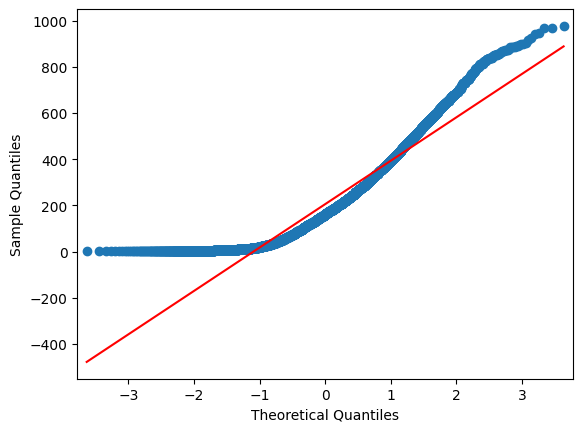

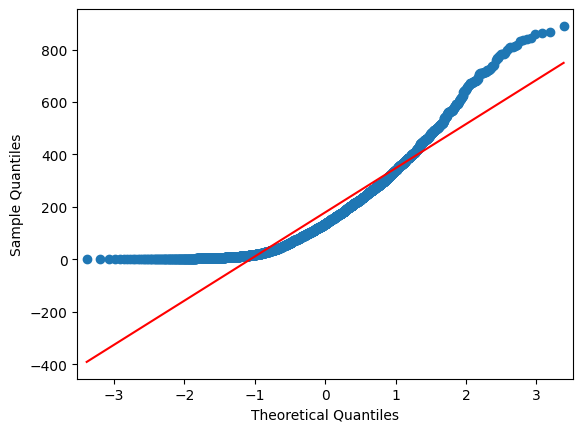

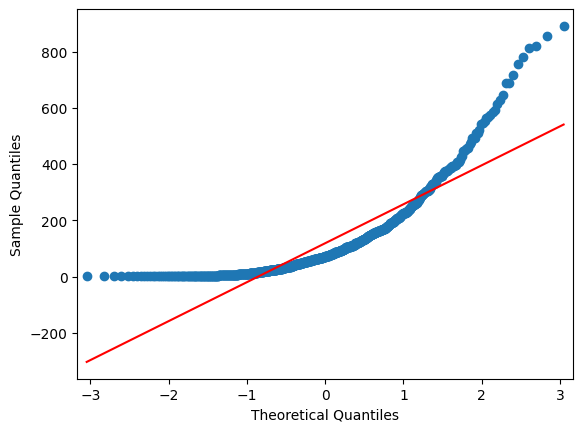

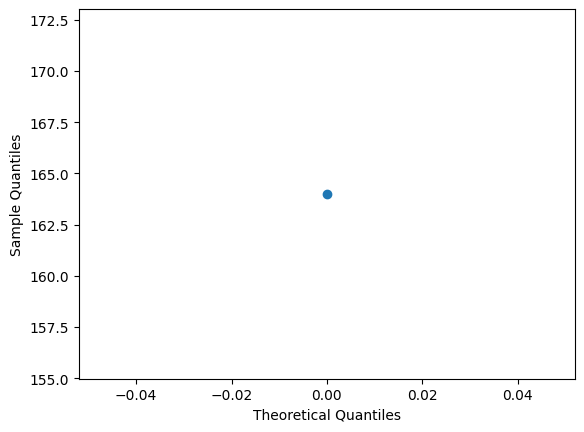

In [ ]:
#Checking for Gaussian or not using qqplot
qqplot(w1,line='s')
qqplot(w2,line='s')
qqplot(w3,line='s')
qqplot(w4,line='s')
plt.show()

In [ ]:
#Checking for similar variances
#Ho: Var is equal
#Ha: Var is not equal

#Performing Levenes Test
l_stat,p_value = st.levene(w1,w2,w3,w4)

print('P-Value: ',p_value)
if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis')
else:
  print('Interpretation: Failed to Reject Null Hypothesis')

P-Value:  3.504937946833238e-35
Interpretation: Reject Null Hypothesis


In [ ]:
#ANOVA test
#Ho: Weather has NO effect on number of cycles rented
#Ha: Weather has AN effect on number of cycles rented

alpha=0.05

#Performing ANOVA test on weather
f_stat,p_value = st.f_oneway(w1,w2,w3,w4)

print('P-Value: ',p_value)
if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis, Weather has AN effect on number of cycles rented')
else:
  print('Interpretation: Failed to Reject Null Hypothesis, Weather has NO effect on number of cycles rented')

P-Value:  5.482069475935669e-42
Interpretation: Reject Null Hypothesis, Weather has AN effect on number of cycles rented


In [ ]:
#Performing Kruskal Test as ANOVA test assumptions are not met
#Ho: Weather has NO effect on number of cycles rented
#Ha: Weather has AN effect on number of cycles rented

alpha=0.05

#Performing Kruskal test on weather
k_stat,p_value = st.kruskal(w1,w2,w3,w4)

print('P-Value: ',p_value)
if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis, Weather has AN effect on number of cycles rented')
else:
  print('Interpretation: Failed to Reject Null Hypothesis, Weather has NO effect on number of cycles rented')

P-Value:  3.501611300708679e-44
Interpretation: Reject Null Hypothesis, Weather has AN effect on number of cycles rented


**Q4.Weather is dependent on season (check between 2 predictor variable)**

In [ ]:
#Generating a crosstab depicting count of every weather in every season
weather_season=pd.crosstab(df['weather'],df['season'])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
#Ho: Weather and Season are Independent
#Ha: Weather and Season are Dependent
alpha=0.05

#Performing Test of independence on season and weather
chi_stat,p_value,dof,exp=st.chi2_contingency(weather_season)

print('P-Value: ',p_value)

if p_value<alpha:
  print('Interpretation: Reject Null Hypothesis, Weather and Season are Dependent')
else:
  print('Interpretation: Failed to Reject Null Hypothesis, Weather and Season are Independent')

P-Value:  1.5499250736864862e-07
Interpretation: Reject Null Hypothesis, Weather and Season are Dependent


**Business Analysis 3:**

1. We concluded both visually and statistically that 'workingday' that is weekday or weekend has no effect on number of bicyces rented.

2. We concluded both visually and statistically that 'season' that is spring,summer,fall,winter has AN effect on number of bicycles rented.

3. We concluded both visually and statistically that 'weather' that is clear,cloudy,light rain,heavy storm has AN effect on number of bicycles rented.

4. We concluded statistically that 'weather' and 'season' are dependent on each other.Weather 1 and 2 prevails most of the time in all seasons while weather 4 is negligible.

# **Business Recommendations**

**1. Seasonal Marketing Strategy:**

Leverage the knowledge that all seasons are equally present to develop targeted marketing and promotional strategies for each season. Consider running seasonal campaigns or offering special promotions during peak seasons (e.g., summer, fall, and winter) to attract more customers.


**2. Weather-Based Inventory Management:**

Adjust your bike inventory based on weather conditions. Since weather 1 (Clear) and 2 (Cloudy) are more prevalent, ensure you have a sufficient number of bikes available during these weather conditions. Conversely, during weather 4 (Thunderstorm and Heavy Rain), consider reducing the number of available bikes to avoid maintenance costs and potential damage.

**3. No Impact of Working Days:**

Since working days (weekdays) and weekends have no significant impact on bike rentals, maintain consistent operational levels throughout the week. Focus on providing quality service and customer support on all days.


**4. Sustainability Initiatives:**

Highlight the environmental benefits of bike rentals during clear and pleasant weather in your marketing efforts. Promote biking as an eco-friendly transportation option.